In [1]:
from src import *

In [2]:
%matplotlib qt
def man_vs_machine(player1, player2, env, n_simulations, update_rate):
    fig = plt.figure(figsize=(20,30))
    ax3 = plt.subplot2grid((2,2),(1,0), colspan=2)
    ax1 = plt.subplot2grid((2,2),(0,0))
    ax2 = plt.subplot2grid((2,2),(0,1))
    

    #fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,23))
    current = player1
    if isinstance(player1, Agent):
        mcts = MCTS(player1.actor, env)
    else:
        mcts = MCTS(player2.actor, env)
    
    while env.get_winner() == 0:
        env.display_board(ax=ax1)
        if isinstance(current, Agent):
            distribution = mcts.search(n_simulations, c=0.5, ax1=ax2, ax2=ax3, update_rate=update_rate, plotting=True)
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts.set_new_root(action)
            
            #ax1.bar([str(action) for action in distribution.keys()],list(distribution.values()))
            #ax_list[1].plot([1,2,3],[1,2,3])
        else:
            #actions = set_piece(env)
            action = input("Enter move as int,int: ")
            action = action.split(',')
            action = (int(action[0]), int(action[1]))
            #action = actions[0]
            #plt.show()
            mcts.set_new_root(action)
            
        env.make_action(action)
        current = player1 if current != player1 else player2
    winner = env.get_winner()
    env.display_board(ax=ax1)
    env.reset()
    return winner




In [3]:
def man_vs_machine(player1, player2, env, n_simulations, update_rate):
    fig = plt.figure(figsize=(20,30))
    ax = plt.subplot2grid((1,1),(0,0))
    #fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,23))
    current = player1
    if isinstance(player1, Agent):
        mcts = MCTS(player1.actor, env)
    else:
        mcts = MCTS(player2.actor, env)
    
    while env.get_winner() == 0:
        env.display_board()
        if isinstance(current, Agent):
            distribution = mcts.search(n_simulations, c=0.5, ax=ax, update_rate=update_rate, plotting=True)
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts.set_new_root(action)
            
            #ax1.bar([str(action) for action in distribution.keys()],list(distribution.values()))
            #ax_list[1].plot([1,2,3],[1,2,3])
        else:
            #actions = set_piece(env)
            action = input("Enter move as int,int: ")
            action = action.split(',')
            action = (int(action[0]), int(action[1]))
            #action = actions[0]
            #plt.show()
            mcts.set_new_root(action)
          
        env.make_action(action)
        current = player1 if current != player1 else player2
    winner = env.get_winner()
    env.display_board(ax=ax)
    env.reset()
    return winner

In [4]:
def play(agent1, agent2, env):
    
    while env.get_winner() == 0:
        if env.current_player == 1:
            action = agent1.actor.get_action(env)
            
        else:
            action = agent2.actor.get_action(env)
        
        env.make_action(action)
        
            
        #env.display_board()
    winner = env.get_winner()
    env.reset()
    return winner

In [5]:
from tensorflow import keras as KER 
encoder = HexEncoder(padding=2)
actor1 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='Models/first6_620.h5'
             )
actor2 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='Models/first6_6160.h5'
             )

agent1 = Agent(actor1)
agent2 = Agent(actor2)

In [5]:
e = Hex((6,6))
blue_winner = 0
red_winner = 0
for i in range(100):
    winner = play(agent1, agent2, e)
    if winner == 1:
        blue_winner += 1
    elif winner == 2:
        red_winner += 1
print("blue winner: {}".format(blue_winner))
print("red winner: {}".format(red_winner))

NameError: name 'agent1' is not defined

In [6]:
hex = Hex((6,6))
man_vs_machine(agent2, "meg", hex, n_simulations=200, update_rate=20)

Enter move as int,int: 3,3


/Users/andersbjelland/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Enter move as int,int: 2,2
Enter move as int,int: 0,3
Enter move as int,int: 1,3
Enter move as int,int: 3,2
Enter move as int,int: 4,3
Enter move as int,int: 5,4
Enter move as int,int: 3,5
Enter move as int,int: 3,4


1

In [21]:
random.seed(1)
actor2 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='Models/newtest_3_3_200.h5'
             )

agent1 = Agent(actor1)
agent2 = Agent(actor2)
hex = Hex((3,3))
hex.set_encoder(encoder)
mcts = MCTS(agent2.actor, hex)
%time mcts.search(1000, c=1)

CPU times: user 10.2 s, sys: 29 ms, total: 10.2 s
Wall time: 10.2 s


{(0, 2): 0.013000000000000001,
 (2, 2): 0.08600000000000001,
 (0, 0): 0.08700000000000001,
 (0, 1): 0.032,
 (1, 0): 0.044,
 (2, 1): 0.078,
 (1, 1): 0.643,
 (1, 2): 0.002,
 (2, 0): 0.015}

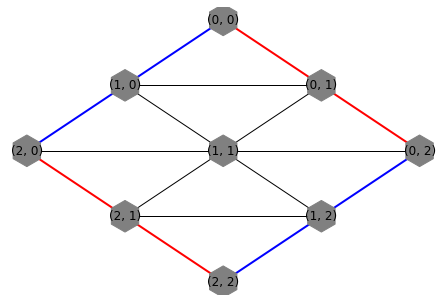

In [19]:
%matplotlib inline
hex.display_board()

In [50]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,5))

In [42]:
ax1.plot([1,2,3],[1,2,3])

In [43]:
ax2.plot([1,2,3],[3,2,1])

In [51]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')


Text(0.5, 1.0, 'Sharing Y axis')

In [54]:
ax2.scatter(x, y)

In [79]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.bar([1,2,3],[1,2,3])


<BarContainer object of 3 artists>

In [10]:
import random
random.random()
plt.plot([1,2,3],[random.random() for _ in range(3)])
plt.show()

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1)
for i in range(10):
    ax1.plot([1,2,3],[random.random() for _ in range(3)])
    plt.draw()
    plt.pause(1)
    

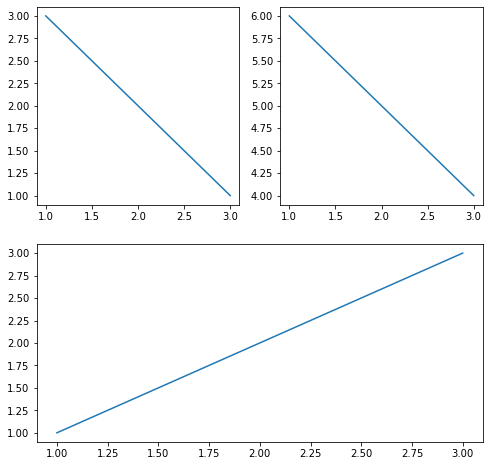

In [16]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax = plt.subplot2grid((2,2),(1,0), colspan=2)
ax.plot([1,2,3],[1,2,3])
ax2=plt.subplot2grid((2,2),(0,0))
ax2.plot([1,2,3],[3,2,1])
ax3=plt.subplot2grid((2,2),(0,1))
ax3.plot([1,2,3],[6,5,4])



In [10]:
plt.cm.Reds

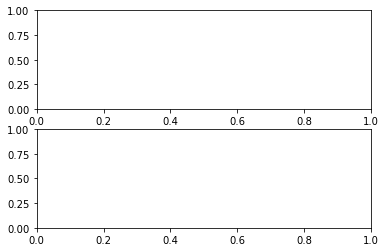

In [9]:
%matplotlib inline
e = Hex((4,4))
dist = {(3,3):0.5, (0,0):0.2}
fig, (ax1, ax2) = plt.subplots(2,1)

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1)
e.display_board(ax =ax1,distribution=dist)


NameError: name 'e' is not defined

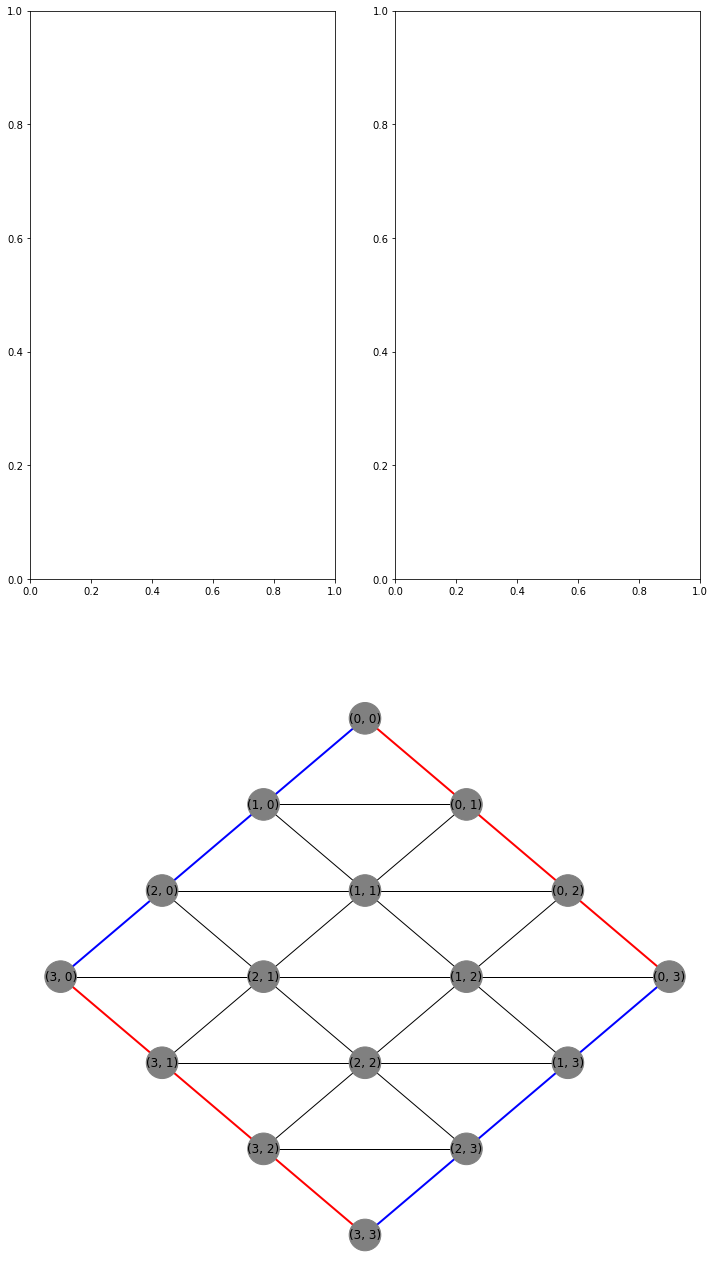

In [12]:
fig = plt.figure(figsize=(12,23))
ax3 = plt.subplot2grid((2,2),(1,0), colspan=2)
ax1 = plt.subplot2grid((2,2),(0,0))
ax2 = plt.subplot2grid((2,2),(0,1))

e.display_board(ax=ax3)
    


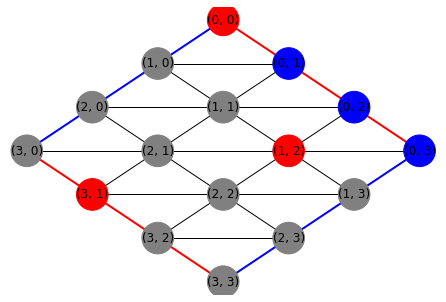

In [11]:
e.display_board()

In [29]:
e = Hex((4,4))
e.set_piece((0,3), 1)
e.set_piece((0,2),1)
e.set_piece((0,1),1)
e.set_piece((1,2),2)
e.set_piece((0,0),2)
e.set_piece((3,1),2)
mcts = MCTS(agent2.actor, env=e)
e.current_player

1

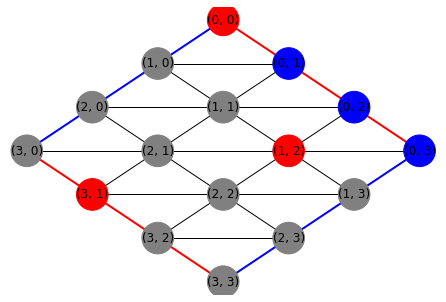

In [30]:
mcts.env.display_board()

In [31]:
dist = mcts.search(50)

<BarContainer object of 10 artists>

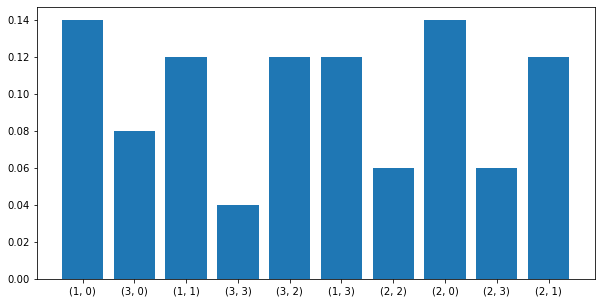

In [32]:
plt.figure(figsize=(10,5))
plt.bar([str(key) for key in list(dist.keys())],dist.values())

In [5]:
G, edge_labels = mcts.visualize_tree(root_color='blue')

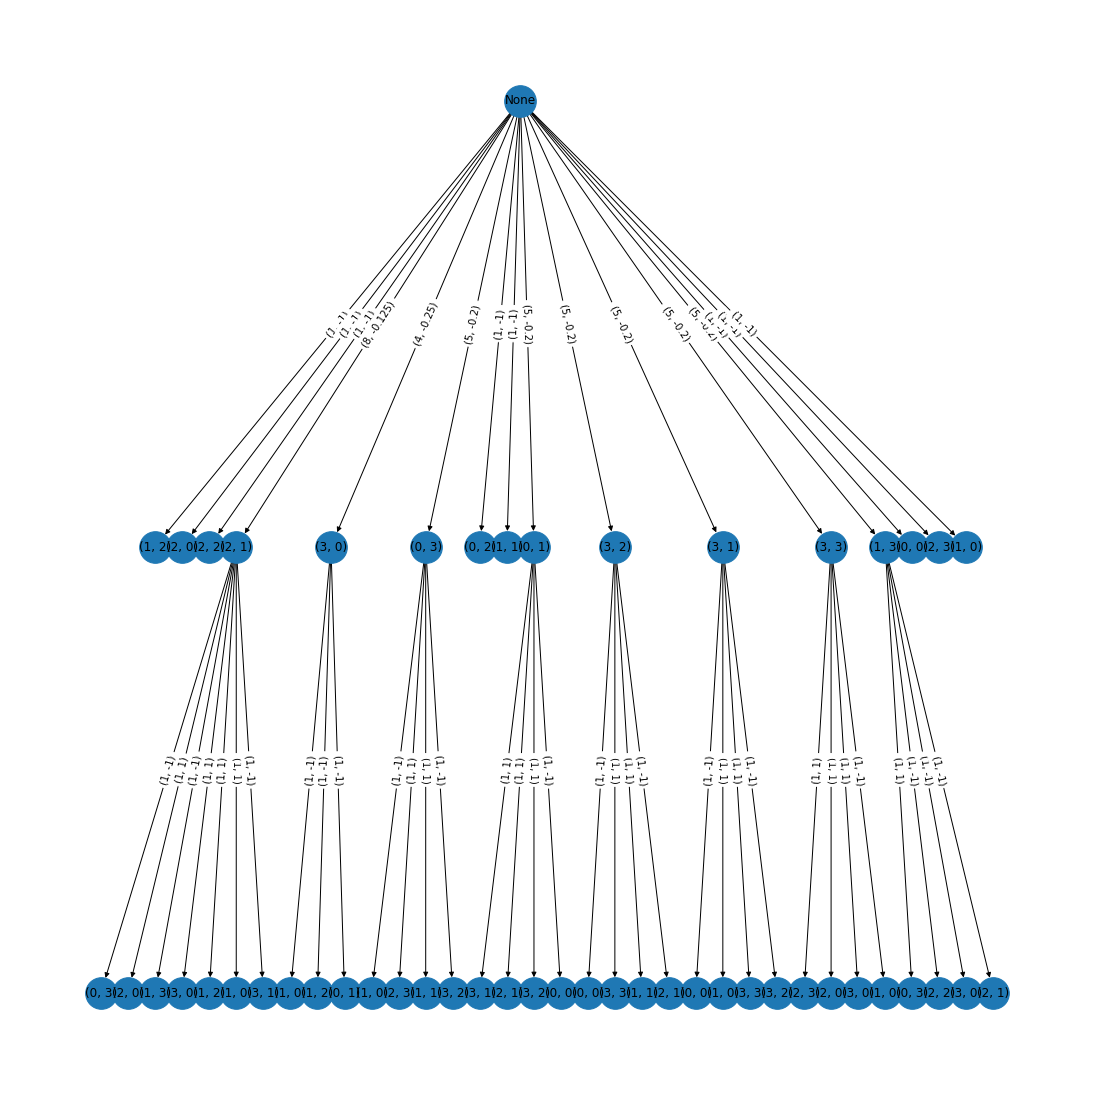

In [7]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
plt.figure(figsize=(15,15))
pos = graphviz_layout(G, prog='dot')
labels = {node:node[0] for node in G.nodes()}
nx.draw(G, pos=pos,node_size=1000, labels=labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [50]:
a = 1

In [51]:
a += 2 if True else 5

In [52]:
a


3

In [53]:
a += 2 if False else -5

In [54]:
a


-2

In [56]:
v = 2
a += v if False else -v

In [57]:
a

-4